In [1]:
import math
import random


class Town:
  def __init__(self, x, y, p, index):
    self.x = x
    self.y = y
    self.p = p
    self.index = index
  def __str__(self):
    return f"Town {self.index}: x={self.x} y={self.y} p={self.p}"
  def __repr__(self):
    return f"Town {self.index}: x={self.x} y={self.y} p={self.p}"



HARD_PENALTY = 10000
LIGHT_PENALTY = 10
def pathFit(towns, individual):
  result_path = 0
  for i in range(1, len(individual)):
    if towns[individual[i]].p > towns[individual[i - 1]].p:
      result_path += HARD_PENALTY
    distance = count_distance(towns[individual[i]], towns[individual[i - 1]])
    if distance > 5:
      result_path += LIGHT_PENALTY
    result_path += distance
    distance = count_distance(towns[individual[-1]], towns[individual[0]])
  if distance > 5:
    result_path += LIGHT_PENALTY
  result_path += distance
  return result_path,

def count_distance(town1, town2):
 return math.sqrt((town1.x - town2.x) ** 2 + (town1.y - town2.y) ** 2)

In [2]:
CROSSOVER_PROB = 0.9
MUTATION_PROB = 0.1
HALL_OF_FAME_SIZE = 3
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

In [3]:
MAX_TOWNS = 10
towns = [Town(random.uniform(0, 30), random.uniform(0, 30), random.randint(0, 30), i) for i in range(MAX_TOWNS)]
print(towns)

[Town 0: x=19.182803953736514 y=0.7503226566800081 p=8, Town 1: x=7.3467556141042865 y=4.186137855754318 p=3, Town 2: x=20.300984622687338 y=26.765387031145362 p=2, Town 3: x=17.71477537347119 y=0.9534803844535078 p=2, Town 4: x=6.559139244108101 y=15.160658643100872 p=0, Town 5: x=16.837351888158388 y=21.480588387672103 p=22, Town 6: x=16.3482444180965 y=6.613218661220901 p=18, Town 7: x=8.345721246919881 y=26.079009623788018 p=24, Town 8: x=24.174577554984236 y=20.944181849646807 p=10, Town 9: x=8.336140250149256 y=6.459412863227664 p=24]


In [4]:
import deap
from deap import base
from deap import creator
from deap import tools

toolbox = base.Toolbox()
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox.register("createTowns", random.sample,
range(MAX_TOWNS), MAX_TOWNS)
toolbox.register("individualCreator", tools.initIterate,
creator.Individual, toolbox.createTowns)
toolbox.register("populationCreator", tools.initRepeat, list,
toolbox.individualCreator)
toolbox.register("evaluate", pathFit, towns)

In [5]:
import itertools
import numpy as np
from deap import algorithms

population_sizes = [50, 100, 200]
max_generation_values = [50, 100, 200]
indpbs = [0.01, 0.05, 0.1]
tournsizes = [2, 3, 5]

best_result = float('inf')
best_individual = None
best_params = None

for population_size, max_generations, indpb, tournsize in itertools.product(population_sizes, max_generation_values, indpbs, tournsizes):
 toolbox.register("select", tools.selTournament, tournsize=tournsize)
 toolbox.register("mate", tools.cxOrdered)
 toolbox.register("mutate", tools.mutShuffleIndexes, indpb=indpb)

 stats = tools.Statistics(lambda ind: ind.fitness.values)
 stats.register("min", np.min)
 stats.register("avg", np.mean)

 population = toolbox.populationCreator(n=population_size)
 hof = tools.HallOfFame(maxsize=HALL_OF_FAME_SIZE)
 population, logbook = algorithms.eaSimple(population=population, toolbox=toolbox, cxpb=CROSSOVER_PROB, mutpb=MUTATION_PROB, ngen=max_generations, halloffame=hof, verbose=False, stats=stats)

 current_best = hof.items[0].fitness.values[0]
 if current_best < best_result:
  best_result = current_best
  best_individual = hof.items[0]
  best_logbook = logbook
  best_params = (population_size, max_generations, indpb, tournsize)
print("Best Params = ", best_params)

Best Params =  (50, 50, 0.01, 5)


In [6]:
print(best_individual)

[9, 7, 5, 6, 8, 0, 1, 3, 2, 4]


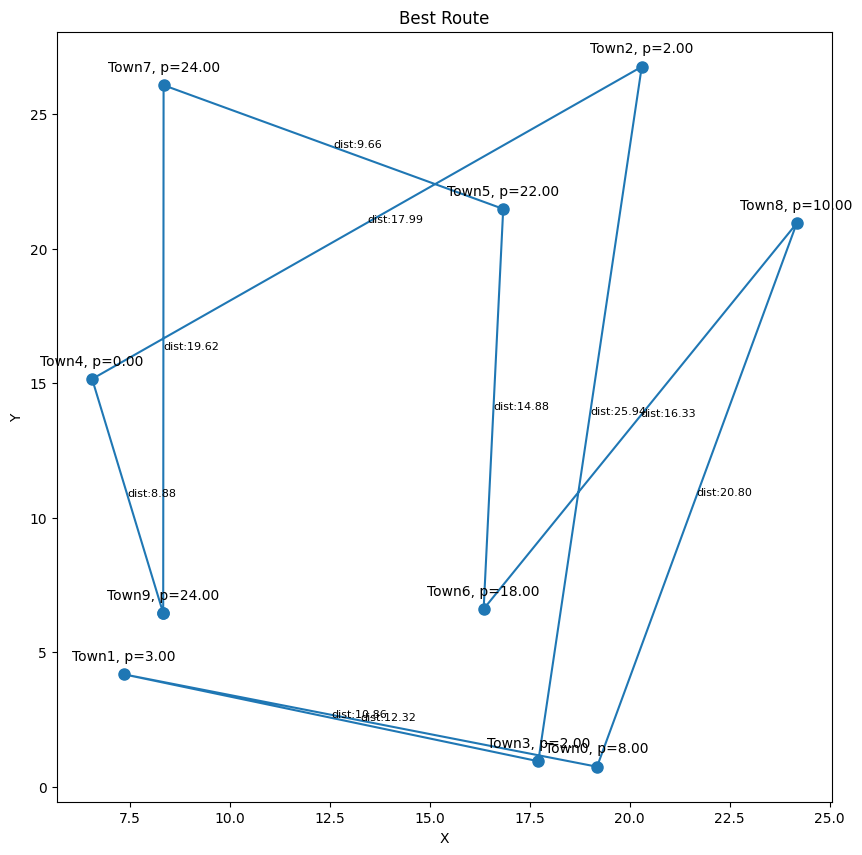

In [7]:
import matplotlib.pyplot as plt

x_coords = [towns[i].x for i in best_individual] +[towns[best_individual[0]].x]
y_coords = [towns[i].y for i in best_individual] +[towns[best_individual[0]].y]

plt.figure(figsize=(10, 10))
plt.plot(x_coords, y_coords, 'o-', markersize=8, label='Route')

for i, town in enumerate(best_individual):
 plt.annotate(f"Town{str(town)}, p={towns[town].p:.2f}", (towns[town].x, towns[town].y), textcoords="offset points", xytext=(0,10), ha='center', color="black")

for i in range(len(best_individual)):
 town1 = towns[best_individual[i]]
 town2 = towns[best_individual[(i + 1) % len(best_individual)]]
 mid_x = (town1.x + town2.x) / 2
 mid_y = (town1.y + town2.y) / 2
 plt.text(mid_x, mid_y, f"dist:{count_distance(town1, town2):.2f}", color="black", fontsize=8)

plt.title("Best Route")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

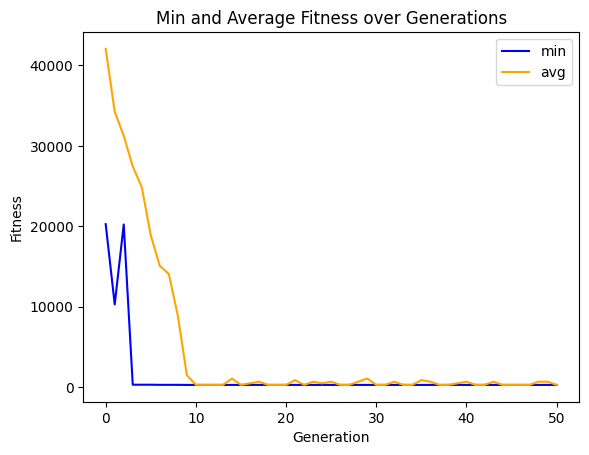

In [14]:
minFitnessValues, meanFitnessValues = best_logbook.select("min", "avg")
plt.plot(minFitnessValues, color='blue', label="min")
plt.plot(meanFitnessValues, color='orange', label="avg")
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Min and Average Fitness over Generations')
plt.legend()
plt.show()

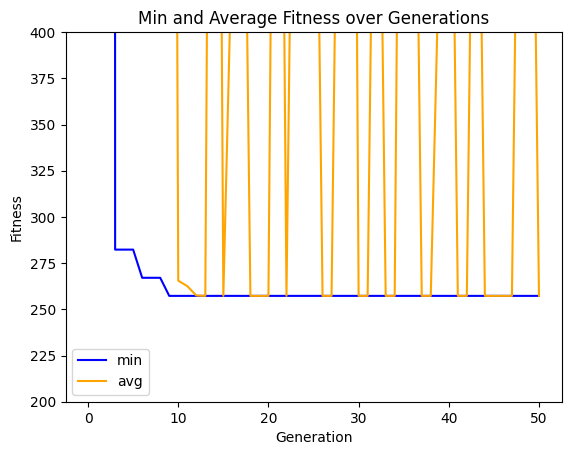

In [15]:
minFitnessValues, meanFitnessValues = best_logbook.select("min", "avg")
plt.plot(minFitnessValues, color='blue', label="min")
plt.plot(meanFitnessValues, color='orange', label="avg")
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Min and Average Fitness over Generations')
plt.legend()
plt.ylim(200, 400)
plt.show()